In [2]:
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(f"{train_images.shape=}")
print(f"{train_labels.shape=}")
print(f"{test_images.shape=}")
print(f"{test_labels.shape=}")


train_images.shape=(60000, 28, 28)
train_labels.shape=(60000,)
test_images.shape=(10000, 28, 28)
test_labels.shape=(10000,)


## 1. USING DENSE LAYER

In [5]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Linearise for the dense layer and normalise the pixel values to be between 0 and 1
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


# One hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:

# Extract some for the validation data
validation_number = 1000

x_val = train_images[:validation_number]
partial_x_train = train_images[validation_number:]

y_val = train_labels[:validation_number]
partial_y_train = train_labels[validation_number:]



history = network.fit(partial_x_train, partial_y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
461/461 [==============================] - 5s 7ms/step - loss: 0.2607 - accuracy: 0.9240 - val_loss: 0.1499 - val_accuracy: 0.9640
Epoch 2/10
461/461 [==============================] - 3s 6ms/step - loss: 0.1056 - accuracy: 0.9688 - val_loss: 0.1117 - val_accuracy: 0.9700
Epoch 3/10
461/461 [==============================] - 3s 6ms/step - loss: 0.0690 - accuracy: 0.9793 - val_loss: 0.0940 - val_accuracy: 0.9710
Epoch 4/10
461/461 [==============================] - 3s 6ms/step - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.0836 - val_accuracy: 0.9750
Epoch 5/10
461/461 [==============================] - 3s 6ms/step - loss: 0.0376 - accuracy: 0.9888 - val_loss: 0.0900 - val_accuracy: 0.9740
Epoch 6/10
461/461 [==============================] - 3s 6ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0975 - val_accuracy: 0.9780
Epoch 7/10
461/461 [==============================] - 3s 6ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0900 - val_accuracy: 0.9760
Epoch 

In [8]:
print(history.history)

{'loss': [0.26074349880218506, 0.10560733079910278, 0.06898769736289978, 0.05022893846035004, 0.037618137896060944, 0.028087304905056953, 0.021926114335656166, 0.016711687669157982, 0.01268720906227827, 0.010031823068857193], 'accuracy': [0.9240338802337646, 0.9687966108322144, 0.9792881608009338, 0.9842711687088013, 0.9887627363204956, 0.9915932416915894, 0.9930169582366943, 0.9952712059020996, 0.9963559508323669, 0.9974067807197571], 'val_loss': [0.14989802241325378, 0.11168374866247177, 0.09398506581783295, 0.08358781784772873, 0.09004159271717072, 0.09752771258354187, 0.08996054530143738, 0.08637677133083344, 0.08273392915725708, 0.09866544604301453], 'val_accuracy': [0.9639999866485596, 0.9700000286102295, 0.9710000157356262, 0.9750000238418579, 0.9739999771118164, 0.9779999852180481, 0.9760000109672546, 0.9779999852180481, 0.9800000190734863, 0.9789999723434448]}


Text(0.5, 1.0, 'Accuracy with fully connected layer')

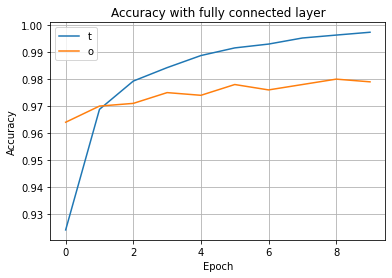

In [9]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epoch')
plt.grid()
plt.legend('topright')
plt.ylabel('Accuracy')
plt.title('Accuracy with fully connected layer')

In [10]:
# Calculating the final accuracy
epoch_count = 6# np.argmax(history.history['val_acc'])

network.fit(train_images, train_labels, epochs=epoch_count, batch_size=128, validation_data=(x_val, y_val))

test_loss, test_acc = network.evaluate(test_images,test_labels)

print('test_acc:', test_acc)

Epoch 1/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0094 - accuracy: 0.9977 - val_loss: 0.0458 - val_accuracy: 0.9890
Epoch 2/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.0153 - val_accuracy: 0.9950
Epoch 3/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.0135 - val_accuracy: 0.9940
Epoch 4/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0098 - val_accuracy: 0.9960
Epoch 5/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0051 - val_accuracy: 0.9980
Epoch 6/6
313/313 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.9820
test_acc: 0.9819999933242798


## 2. Using CNN

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Linearise for the dense layer and normalise the pixel values to be between 0 and 1
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


# One hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
validation_number = 1000
x_val = train_images[:validation_number]
partial_x_train = train_images[validation_number:]



y_val = train_labels[:validation_number]
partial_y_train = train_labels[validation_number:]


print(f"{train_images.shape=}")
print(f"{train_labels.shape=}")
print(f"{test_images.shape=}")
print(f"{test_labels.shape=}")

train_images.shape=(60000, 28, 28, 1)
train_labels.shape=(60000, 10)
test_images.shape=(10000, 28, 28, 1)
test_labels.shape=(10000, 10)


In [5]:
# Extract some for the validation data





history = model.fit(partial_x_train, partial_y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/30


KeyboardInterrupt: 

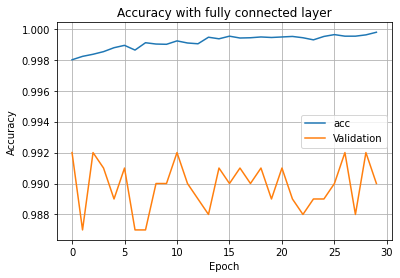

In [ ]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.ylabel('Accuracy')
plt.title('Accuracy with fully connected layer')
plt.show()

In [11]:
# Calculating the final accuracy
epoch_count = 5# np.argmax(history.history['val_acc'])

model.fit(train_images, train_labels, epochs=epoch_count, batch_size=128, validation_data=(x_val, y_val))

test_loss, test_acc = model.evaluate(test_images,test_labels)
model.save('mnist_cnn.h5')
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 9s 13ms/step - loss: 0.2354 - accuracy: 0.9256 - val_loss: 0.0872 - val_accuracy: 0.9810
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.0608 - val_accuracy: 0.9810
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0406 - val_accuracy: 0.9910
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0318 - val_accuracy: 0.9890
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0245 - accuracy: 0.9918
test_acc: 0.9918000102043152


In [12]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, "model_mnist_cnn.json")